In [1]:
#pip install dexplot

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dexplot as dxp

In [3]:
daily_df = pd.read_csv("Resources/CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals (3).csv")
monthly_df = pd.read_csv("Resources/CTA_-_Ridership_-__L__Station_Entries_-_Monthly_Day-Type_Averages___Totals_2019.csv")

In [4]:
daily_df.head()

,station_id,stationname,date,daytype,rides
0,41240,Addison-O'Hare,1/1/2014,U,928
1,41310,Paulina,1/1/2014,U,1140
2,40290,Ashland/63rd,1/1/2014,U,641
3,41460,Irving Park-Brown,1/1/2014,U,999
4,40580,54th/Cermak,1/1/2014,U,641


In [5]:
monthly_df.head()

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
0,40900,Howard,1/1/2014,5665.7,4130.3,3042.2,156378
1,41190,Jarvis,1/1/2014,1509.8,1363.0,1025.6,43795
2,40100,Morse,1/1/2014,3652.2,3075.5,2350.6,104404
3,41300,Loyola,1/1/2014,5831.0,4617.3,3299.8,163251
4,40760,Granville,1/1/2014,3834.7,3228.5,2403.2,109294


In [6]:
#rename the columns for the daily df
daily_df = daily_df.rename(columns={'station_id': 'Station ID',
                        'stationame': 'Station Name',
                        'date': 'Date',
                        'daytype': 'Day Type',
                        'rides': 'Rides'})

In [7]:
#rename the columns for the monthly df
monthly_df = monthly_df.rename(columns={'station_id': 'Station ID',
                           'stationame': 'Station Name',
                           'month_beginning': 'Month Date',
                           'avg_weekday_rides': 'Average Weekday Rides',
                           'avg_saturday_rides': 'Average Saturday Rides',
                           'avg_sunday-holiday_rides': 'Average Sunday-Holiday Rides',
                           'monthtotal': 'Monthly Total'})

In [8]:
monthly_df.head()

,Station ID,Station Name,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total
0,40900,Howard,1/1/2014,5665.7,4130.3,3042.2,156378
1,41190,Jarvis,1/1/2014,1509.8,1363.0,1025.6,43795
2,40100,Morse,1/1/2014,3652.2,3075.5,2350.6,104404
3,41300,Loyola,1/1/2014,5831.0,4617.3,3299.8,163251
4,40760,Granville,1/1/2014,3834.7,3228.5,2403.2,109294


In [9]:
#january2014 = monthly_df.loc[monthly_df['Month'] == "1/1/2014"]

In [10]:
monthly_df['Month Date'] = pd.to_datetime(monthly_df['Month Date'])
monthly_df['Month Date']

0       2014-01-01
1       2014-01-01
2       2014-01-01
3       2014-01-01
4       2014-01-01
           ...    
12349   2021-02-01
12350   2021-02-01
12351   2021-02-01
12352   2021-02-01
12353   2021-02-01
Name: Month Date, Length: 12354, dtype: datetime64[ns]

In [11]:
monthly_df['Year'] = monthly_df['Month Date'].dt.year
monthly_df['Month'] = monthly_df['Month Date'].dt.month

In [12]:
monthly_df.head()

,Station ID,Station Name,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month
0,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1
1,41190,Jarvis,2014-01-01,1509.8,1363.0,1025.6,43795,2014,1
2,40100,Morse,2014-01-01,3652.2,3075.5,2350.6,104404,2014,1
3,41300,Loyola,2014-01-01,5831.0,4617.3,3299.8,163251,2014,1
4,40760,Granville,2014-01-01,3834.7,3228.5,2403.2,109294,2014,1


In [13]:
lstops = pd.read_csv("Resources/CTA_-_System_Information_-_List_of__L__Stops.csv")
lstops.head()

,STOP_ID,DIRECTION_ID,STOP_NAME,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,30162,W,18th (54th/Cermak-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
1,30161,E,18th (Loop-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
2,30022,N,35th/Archer (Loop-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
3,30023,S,35th/Archer (Midway-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
4,30214,S,35-Bronzeville-IIT (63rd-bound),35th-Bronzeville-IIT,35th-Bronzeville-IIT (Green Line),41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)"


In [14]:
lstops = lstops.rename(columns={'MAP_ID': 'Station ID',
                                'STATION_NAME': 'Station Name',
                           'STATION_DESCRIPTIVE_NAME': 'Line Color'})
lstops.head()

,STOP_ID,DIRECTION_ID,STOP_NAME,Station Name,Line Color,Station ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,30162,W,18th (54th/Cermak-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
1,30161,E,18th (Loop-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
2,30022,N,35th/Archer (Loop-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
3,30023,S,35th/Archer (Midway-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
4,30214,S,35-Bronzeville-IIT (63rd-bound),35th-Bronzeville-IIT,35th-Bronzeville-IIT (Green Line),41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)"


In [15]:
merge_df = pd.merge(monthly_df, lstops, on = "Station ID")
merge_df

,Station ID,Station Name_x,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month,STOP_ID,...,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,30176,...,False,False,False,False,True,True,True,False,False,"(42.019063, -87.672892)"
1,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,30173,...,True,False,False,False,False,False,False,False,False,"(42.019063, -87.672892)"
2,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,30174,...,True,False,False,False,False,False,False,False,False,"(42.019063, -87.672892)"
3,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,30175,...,False,False,False,False,True,True,True,False,False,"(42.019063, -87.672892)"
4,40900,Howard,2014-02-01,6334.2,4197.3,3195.5,156254,2014,2,30176,...,False,False,False,False,True,True,True,False,False,"(42.019063, -87.672892)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25689,41700,Washington/Wabash,2020-12-01,2313.1,1686.0,1079.0,63027,2020,12,30383,...,False,False,True,True,False,False,False,False,False,"(41.88322, -87.626189)"
25690,41700,Washington/Wabash,2021-01-01,2159.1,1447.2,928.2,55986,2021,1,30384,...,False,False,True,False,False,True,False,True,True,"(41.88322, -87.626189)"
25691,41700,Washington/Wabash,2021-01-01,2159.1,1447.2,928.2,55986,2021,1,30383,...,False,False,True,True,False,False,False,False,False,"(41.88322, -87.626189)"
25692,41700,Washington/Wabash,2021-02-01,2193.9,1506.8,937.8,53656,2021,2,30384,...,False,False,True,False,False,True,False,True,True,"(41.88322, -87.626189)"


In [16]:
merge_df.columns

Index(['Station ID', 'Station Name_x', 'Month Date', 'Average Weekday Rides',
       'Average Saturday Rides', 'Average Sunday-Holiday Rides',
       'Monthly Total', 'Year', 'Month', 'STOP_ID', 'DIRECTION_ID',
       'STOP_NAME', 'Station Name_y', 'Line Color', 'ADA', 'RED', 'BLUE', 'G',
       'BRN', 'P', 'Pexp', 'Y', 'Pnk', 'O', 'Location'],
      dtype='object')

In [17]:
new_monthly_df = merge_df.drop(columns = ['STOP_ID', 'DIRECTION_ID', 'STOP_NAME', 'Station Name_y', 'ADA', 'RED', 'BLUE', 'G', 'BRN', 'P', 'Pexp', 'Y', 'Pnk', 'O'])
new_monthly_df

,Station ID,Station Name_x,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month,Line Color,Location
0,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)"
1,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)"
2,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)"
3,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)"
4,40900,Howard,2014-02-01,6334.2,4197.3,3195.5,156254,2014,2,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)"
...,...,...,...,...,...,...,...,...,...,...,...
25689,41700,Washington/Wabash,2020-12-01,2313.1,1686.0,1079.0,63027,2020,12,"Washington/Wabash (Brown, Green, Orange, Purpl...","(41.88322, -87.626189)"
25690,41700,Washington/Wabash,2021-01-01,2159.1,1447.2,928.2,55986,2021,1,"Washington/Wabash (Brown, Green, Orange, Purpl...","(41.88322, -87.626189)"
25691,41700,Washington/Wabash,2021-01-01,2159.1,1447.2,928.2,55986,2021,1,"Washington/Wabash (Brown, Green, Orange, Purpl...","(41.88322, -87.626189)"
25692,41700,Washington/Wabash,2021-02-01,2193.9,1506.8,937.8,53656,2021,2,"Washington/Wabash (Brown, Green, Orange, Purpl...","(41.88322, -87.626189)"


In [18]:
new_monthly_df [["Station Name 2", "L Color"]] = new_monthly_df["Line Color"].str.split("(",expand=True)
new_monthly_df

,Station ID,Station Name_x,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month,Line Color,Location,Station Name 2,L Color
0,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
1,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
2,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
3,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
4,40900,Howard,2014-02-01,6334.2,4197.3,3195.5,156254,2014,2,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25689,41700,Washington/Wabash,2020-12-01,2313.1,1686.0,1079.0,63027,2020,12,"Washington/Wabash (Brown, Green, Orange, Purpl...","(41.88322, -87.626189)",Washington/Wabash,"Brown, Green, Orange, Purple & Pink Lines)"
25690,41700,Washington/Wabash,2021-01-01,2159.1,1447.2,928.2,55986,2021,1,"Washington/Wabash (Brown, Green, Orange, Purpl...","(41.88322, -87.626189)",Washington/Wabash,"Brown, Green, Orange, Purple & Pink Lines)"
25691,41700,Washington/Wabash,2021-01-01,2159.1,1447.2,928.2,55986,2021,1,"Washington/Wabash (Brown, Green, Orange, Purpl...","(41.88322, -87.626189)",Washington/Wabash,"Brown, Green, Orange, Purple & Pink Lines)"
25692,41700,Washington/Wabash,2021-02-01,2193.9,1506.8,937.8,53656,2021,2,"Washington/Wabash (Brown, Green, Orange, Purpl...","(41.88322, -87.626189)",Washington/Wabash,"Brown, Green, Orange, Purple & Pink Lines)"


In [70]:
new_monthly_df = new_monthly_df.drop_duplicates()
new_monthly_df

,Station ID,Station Name_x,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month,Line Color,Location,Station Name 2,L Color
0,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
4,40900,Howard,2014-02-01,6334.2,4197.3,3195.5,156254,2014,2,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
8,40900,Howard,2014-03-01,6336.1,4662.6,3404.4,173393,2014,3,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
12,40900,Howard,2014-04-01,6281.5,4641.5,3398.3,170351,2014,4,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
16,40900,Howard,2014-05-01,6336.4,4546.4,3408.0,172836,2014,5,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25684,41700,Washington/Wabash,2020-10-01,2666.5,1791.6,1243.0,72593,2020,10,"Washington/Wabash (Brown, Green, Orange, Purpl...","(41.88322, -87.626189)",Washington/Wabash,"Brown, Green, Orange, Purple & Pink Lines)"
25686,41700,Washington/Wabash,2020-11-01,2297.0,1657.3,1067.8,58975,2020,11,"Washington/Wabash (Brown, Green, Orange, Purpl...","(41.88322, -87.626189)",Washington/Wabash,"Brown, Green, Orange, Purple & Pink Lines)"
25688,41700,Washington/Wabash,2020-12-01,2313.1,1686.0,1079.0,63027,2020,12,"Washington/Wabash (Brown, Green, Orange, Purpl...","(41.88322, -87.626189)",Washington/Wabash,"Brown, Green, Orange, Purple & Pink Lines)"
25690,41700,Washington/Wabash,2021-01-01,2159.1,1447.2,928.2,55986,2021,1,"Washington/Wabash (Brown, Green, Orange, Purpl...","(41.88322, -87.626189)",Washington/Wabash,"Brown, Green, Orange, Purple & Pink Lines)"


In [79]:
# cleaning L color column  
new_monthly_df["L Color"] = new_monthly_df["L Color"].str.replace(")", "",regex = True)
new_monthly_df.head()

,Station ID,Station Name_x,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month,Line Color,Location,Station Name 2,L Color
0,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines"
4,40900,Howard,2014-02-01,6334.2,4197.3,3195.5,156254,2014,2,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines"
8,40900,Howard,2014-03-01,6336.1,4662.6,3404.4,173393,2014,3,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines"
12,40900,Howard,2014-04-01,6281.5,4641.5,3398.3,170351,2014,4,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines"
16,40900,Howard,2014-05-01,6336.4,4546.4,3408.0,172836,2014,5,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines"


In [82]:
red_and_blue_df = new_monthly_df[((new_monthly_df['L Color'] == 'Red Line') | (new_monthly_df['L Color'] == 'Blue Line'))]
red_and_blue_df

,Station ID,Station Name_x,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month,Line Color,Location,Station Name 2,L Color
344,41190,Jarvis,2014-01-01,1509.8,1363.0,1025.6,43795,2014,1,Jarvis (Red Line),"(42.015876, -87.669092)",Jarvis,Red Line
346,41190,Jarvis,2014-02-01,1649.2,1429.8,1080.8,43025,2014,2,Jarvis (Red Line),"(42.015876, -87.669092)",Jarvis,Red Line
348,41190,Jarvis,2014-03-01,1675.1,1419.4,1035.4,47452,2014,3,Jarvis (Red Line),"(42.015876, -87.669092)",Jarvis,Red Line
350,41190,Jarvis,2014-04-01,1659.0,1471.3,1057.0,46612,2014,4,Jarvis (Red Line),"(42.015876, -87.669092)",Jarvis,Red Line
352,41190,Jarvis,2014-05-01,1702.7,1496.6,1129.6,48888,2014,5,Jarvis (Red Line),"(42.015876, -87.669092)",Jarvis,Red Line
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13926,40390,Forest Park,2020-10-01,1050.1,671.6,487.8,28412,2020,10,Forest Park (Blue Line),"(41.874257, -87.817318)",Forest Park,Blue Line
13928,40390,Forest Park,2020-11-01,959.9,602.0,461.5,24375,2020,11,Forest Park (Blue Line),"(41.874257, -87.817318)",Forest Park,Blue Line
13930,40390,Forest Park,2020-12-01,896.9,522.8,436.2,24003,2020,12,Forest Park (Blue Line),"(41.874257, -87.817318)",Forest Park,Blue Line
13932,40390,Forest Park,2021-01-01,855.0,519.0,399.3,22090,2021,1,Forest Park (Blue Line),"(41.874257, -87.817318)",Forest Park,Blue Line


In [87]:
red_and_blue_clean_df = red_and_blue_df.drop(['Station ID', 'Month Date','Average Weekday Rides','Average Saturday Rides','Average Sunday-Holiday Rides','Line Color','Location','Station Name 2'], axis=1)
red_and_blue_clean_df

,Station Name_x,Monthly Total,Year,Month,L Color
344,Jarvis,43795,2014,1,Red Line
346,Jarvis,43025,2014,2,Red Line
348,Jarvis,47452,2014,3,Red Line
350,Jarvis,46612,2014,4,Red Line
352,Jarvis,48888,2014,5,Red Line
...,...,...,...,...,...
13926,Forest Park,28412,2020,10,Blue Line
13928,Forest Park,24375,2020,11,Blue Line
13930,Forest Park,24003,2020,12,Blue Line
13932,Forest Park,22090,2021,1,Blue Line


In [88]:
# look at red and blue lines by year 
red_and_blue_clean_df_2014 = red_and_blue_clean_df[red_and_blue_clean_df.Year==2014].copy()
red_and_blue_clean_df_2015 = red_and_blue_clean_df[red_and_blue_clean_df.Year==2015].copy()
red_and_blue_clean_df_2016 = red_and_blue_clean_df[red_and_blue_clean_df.Year==2016].copy()
red_and_blue_clean_df_2017 = red_and_blue_clean_df[red_and_blue_clean_df.Year==2017].copy()
red_and_blue_clean_df_2018 = red_and_blue_clean_df[red_and_blue_clean_df.Year==2018].copy()
red_and_blue_clean_df_2019 = red_and_blue_clean_df[red_and_blue_clean_df.Year==2019].copy()
red_and_blue_clean_df_2020 = red_and_blue_clean_df[red_and_blue_clean_df.Year==2020].copy()
red_and_blue_clean_df_2014.head()

,Station Name_x,Monthly Total,Year,Month,L Color
344,Jarvis,43795,2014,1,Red Line
346,Jarvis,43025,2014,2,Red Line
348,Jarvis,47452,2014,3,Red Line
350,Jarvis,46612,2014,4,Red Line
352,Jarvis,48888,2014,5,Red Line


In [90]:
# group red and blue lines by year by station 
red_and_blue_station_grouped2014 = red_and_blue_clean_df_2014.groupby('Station Name_x')
red_and_blue_station_grouped2015 = red_and_blue_clean_df_2015.groupby('Station Name_x')
red_and_blue_station_grouped2016 = red_and_blue_clean_df_2016.groupby('Station Name_x')
red_and_blue_station_grouped2017 = red_and_blue_clean_df_2017.groupby('Station Name_x')
red_and_blue_station_grouped2018 = red_and_blue_clean_df_2018.groupby('Station Name_x')
red_and_blue_station_grouped2019 = red_and_blue_clean_df_2019.groupby('Station Name_x')
red_and_blue_station_grouped2020 = red_and_blue_clean_df_2020.groupby('Station Name_x')
red_and_blue_station_grouped2014.head()

,Station Name_x,Monthly Total,Year,Month,L Color
344,Jarvis,43795,2014,1,Red Line
346,Jarvis,43025,2014,2,Red Line
348,Jarvis,47452,2014,3,Red Line
350,Jarvis,46612,2014,4,Red Line
352,Jarvis,48888,2014,5,Red Line
...,...,...,...,...,...
13764,Forest Park,82079,2014,1,Blue Line
13766,Forest Park,83685,2014,2,Blue Line
13768,Forest Park,94142,2014,3,Blue Line
13770,Forest Park,98806,2014,4,Blue Line


In [91]:
# find monthly totals of usage for each station in red and blue solo lines by year 
red_and_blue_station_sum2014 = red_and_blue_station_grouped2014.sum(['Monthly Total'])
red_and_blue_station_sum2015 = red_and_blue_station_grouped2015.sum(['Monthly Total'])
red_and_blue_station_sum2016 = red_and_blue_station_grouped2016.sum(['Monthly Total'])
red_and_blue_station_sum2017 = red_and_blue_station_grouped2017.sum(['Monthly Total'])
red_and_blue_station_sum2018 = red_and_blue_station_grouped2018.sum(['Monthly Total'])
red_and_blue_station_sum2019 = red_and_blue_station_grouped2019.sum(['Monthly Total'])
red_and_blue_station_sum2020 = red_and_blue_station_grouped2020.sum(['Monthly Total'])
red_and_blue_station_sum2014.head()

,Monthly Total,Year,Month
Station Name_x,,,
47th-Dan Ryan,1038641,24168,78
63rd-Dan Ryan,1127593,24168,78
69th,1800001,24168,78
79th,2418676,24168,78
87th,1506362,24168,78


In [92]:
red_and_blue_station_viz2014 = red_and_blue_station_sum2014['Monthly Total']
red_and_blue_station_viz2015 = red_and_blue_station_sum2015['Monthly Total']
red_and_blue_station_viz2016 = red_and_blue_station_sum2016['Monthly Total']
red_and_blue_station_viz2017 = red_and_blue_station_sum2017['Monthly Total']
red_and_blue_station_viz2018 = red_and_blue_station_sum2018['Monthly Total']
red_and_blue_station_viz2019 = red_and_blue_station_sum2019['Monthly Total']
red_and_blue_station_viz2020 = red_and_blue_station_sum2020['Monthly Total']
red_and_blue_station_viz2014.head()

Station Name_x
47th-Dan Ryan    1038641
63rd-Dan Ryan    1127593
69th             1800001
79th             2418676
87th             1506362
Name: Monthly Total, dtype: int64

In [93]:
red_and_blue_station_df_viz = pd.concat([red_and_blue_station_viz2014, red_and_blue_station_viz2015, red_and_blue_station_viz2016, red_and_blue_station_viz2017, red_and_blue_station_viz2018, red_and_blue_station_viz2019, red_and_blue_station_viz2020],axis=1)
red_and_blue_station_df_viz.columns = ['2014','2015', '2016', '2017', '2018', '2019', '2020']
red_and_blue_station_df_viz

,2014,2015,2016,2017,2018,2019,2020
Station Name_x,,,,,,,
47th-Dan Ryan,1038641,1092041,1045205,909500,931630,869861,403043
63rd-Dan Ryan,1127593,1035030,1047620,979354,974550,937730,452870
69th,1800001,1870456,1780101,1665318,1564203,1423925,682175
79th,2418676,2507871,2363196,2213115,2120951,1975866,972675
87th,1506362,1516456,1408573,1320551,1286860,1186724,551680
95th/Dan Ryan,7339198,7352430,6937456,6522292,6049978,5637652,2850190
Addison-North Main,2884871,3034778,3162117,2971892,2832150,2597371,639529
Addison-O'Hare,876226,949756,864771,887340,909660,872016,299410
Argyle,1079365,1078620,1059541,1011067,1008592,970130,367329


In [94]:
red_and_blue_station_df_viz.index

Index(['47th-Dan Ryan', '63rd-Dan Ryan', '69th', '79th', '87th',
       '95th/Dan Ryan', 'Addison-North Main', 'Addison-O'Hare', 'Argyle',
       'Austin-Forest Park', 'Belmont-O'Hare', 'Berwyn', 'Bryn Mawr',
       'California/Milwaukee', 'Cermak-Chinatown', 'Chicago/Milwaukee',
       'Chicago/State', 'Cicero-Forest Park', 'Clark/Division',
       'Clinton-Forest Park', 'Cumberland', 'Damen/Milwaukee',
       'Division/Milwaukee', 'Forest Park', 'Garfield-Dan Ryan',
       'Grand/Milwaukee', 'Grand/State', 'Granville', 'Harrison',
       'Irving Park-O'Hare', 'Jackson/Dearborn', 'Jackson/State', 'Jarvis',
       'Jefferson Park', 'Kedzie-Homan-Forest Park', 'LaSalle', 'Lake/State',
       'Lawrence', 'Logan Square', 'Loyola', 'Medical Center',
       'Monroe/Dearborn', 'Monroe/State', 'Montrose-O'Hare', 'Morse',
       'North/Clybourn', 'O'Hare Airport', 'Oak Park-Forest Park',
       'Pulaski-Forest Park', 'Racine', 'Rosemont', 'Sheridan',
       'Sox-35th-Dan Ryan', 'Thorndale', 'U

In [95]:
red_and_blue_station_df_viz.reset_index(inplace=True)
red_and_blue_station_df_viz

,Station Name_x,2014,2015,2016,2017,2018,2019,2020
0,47th-Dan Ryan,1038641,1092041,1045205,909500,931630,869861,403043
1,63rd-Dan Ryan,1127593,1035030,1047620,979354,974550,937730,452870
2,69th,1800001,1870456,1780101,1665318,1564203,1423925,682175
3,79th,2418676,2507871,2363196,2213115,2120951,1975866,972675
4,87th,1506362,1516456,1408573,1320551,1286860,1186724,551680
5,95th/Dan Ryan,7339198,7352430,6937456,6522292,6049978,5637652,2850190
6,Addison-North Main,2884871,3034778,3162117,2971892,2832150,2597371,639529
7,Addison-O'Hare,876226,949756,864771,887340,909660,872016,299410
8,Argyle,1079365,1078620,1059541,1011067,1008592,970130,367329
9,Austin-Forest Park,638728,634972,626593,599330,569666,543533,207693


In [96]:
red_and_blue_station_df_viz.rename(columns={"index": "Station"}, inplace=True)
red_and_blue_station_df_viz

,Station Name_x,2014,2015,2016,2017,2018,2019,2020
0,47th-Dan Ryan,1038641,1092041,1045205,909500,931630,869861,403043
1,63rd-Dan Ryan,1127593,1035030,1047620,979354,974550,937730,452870
2,69th,1800001,1870456,1780101,1665318,1564203,1423925,682175
3,79th,2418676,2507871,2363196,2213115,2120951,1975866,972675
4,87th,1506362,1516456,1408573,1320551,1286860,1186724,551680
5,95th/Dan Ryan,7339198,7352430,6937456,6522292,6049978,5637652,2850190
6,Addison-North Main,2884871,3034778,3162117,2971892,2832150,2597371,639529
7,Addison-O'Hare,876226,949756,864771,887340,909660,872016,299410
8,Argyle,1079365,1078620,1059541,1011067,1008592,970130,367329
9,Austin-Forest Park,638728,634972,626593,599330,569666,543533,207693


In [102]:
red_and_blue_station_df_viz.head()

,Station Name_x,2014,2015,2016,2017,2018,2019,2020
0,47th-Dan Ryan,1038641,1092041,1045205,909500,931630,869861,403043
1,63rd-Dan Ryan,1127593,1035030,1047620,979354,974550,937730,452870
2,69th,1800001,1870456,1780101,1665318,1564203,1423925,682175
3,79th,2418676,2507871,2363196,2213115,2120951,1975866,972675
4,87th,1506362,1516456,1408573,1320551,1286860,1186724,551680


In [101]:
#look at values to figure out how to restrict to busiest stations 
red_and_blue_station_df_viz.describe()

,2014,2015,2016,2017,2018,2019,2020
count,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01
mean,1.908191e+06,1.977117e+06,1.953333e+06,1.866938e+06,1.811512e+06,1.739142e+06,6.024282e+05
std,1.370562e+06,1.434897e+06,1.419719e+06,1.356164e+06,1.312324e+06,1.270122e+06,4.530147e+05
min,4.806850e+05,4.829400e+05,4.787180e+05,4.421130e+05,4.155540e+05,4.085390e+05,1.515890e+05
25%,1.074006e+06,1.067722e+06,1.047016e+06,9.889450e+05,9.743282e+05,9.286062e+05,3.506060e+05
50%,1.584935e+06,1.576828e+06,1.562356e+06,1.509610e+06,1.449272e+06,1.389042e+06,4.852365e+05
75%,2.173428e+06,2.259403e+06,2.305730e+06,2.172963e+06,2.098229e+06,2.025195e+06,6.866918e+05
max,7.339198e+06,7.352430e+06,7.013905e+06,6.650401e+06,6.604902e+06,6.450839e+06,2.850190e+06


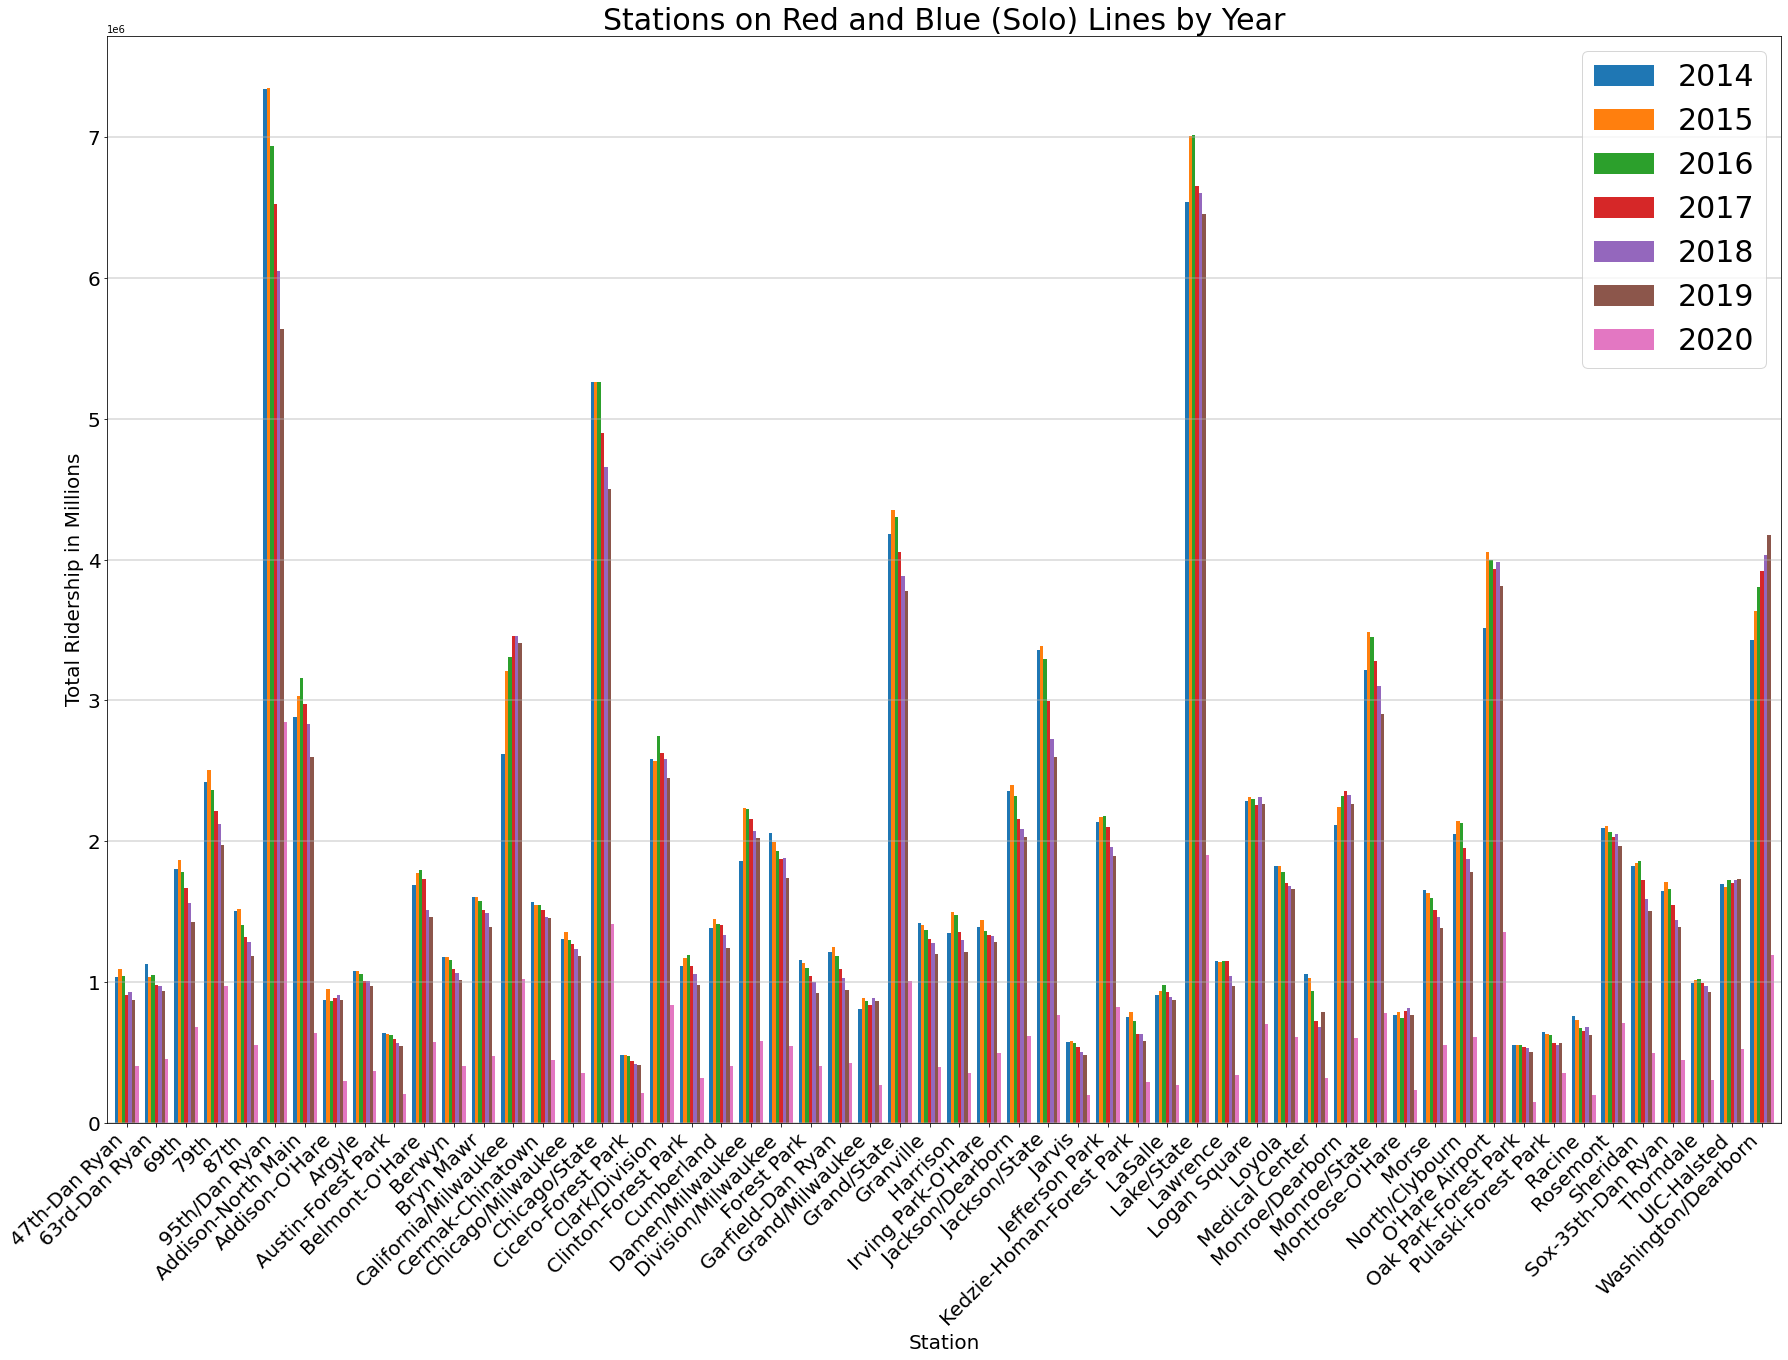

In [107]:
#plot
red_and_blue_station_df_viz.plot.bar(x='Station Name_x', figsize=(30,20), fontsize=20, width=.8)
plt.xticks(ha='right', rotation=45)
plt.title('Stations on Red and Blue (Solo) Lines by Year', fontsize=30)
plt.ylabel('Total Ridership in Millions', fontsize=20)
plt.xlabel('Station', fontsize=20)
plt.legend(fontsize='xx-large', prop={'size': 30})
plt.grid(axis='y', alpha=.5, linewidth=1.5)
plt.savefig('Red and Blue L Ridership by Station by Year.png')

In [108]:
#limit to busiest stations 
busiest_stations = ['95th/Dan Ryan', 'Chicago/State', 'Grand/State', 'Lake/State', 'Washington/Dearborn']

In [109]:
#restrict 95th/Dan Ryan  
busiest_red_and_blue_station_df_viz = red_and_blue_station_df_viz[red_and_blue_station_df_viz['Station Name_x'].isin(busiest_stations)]


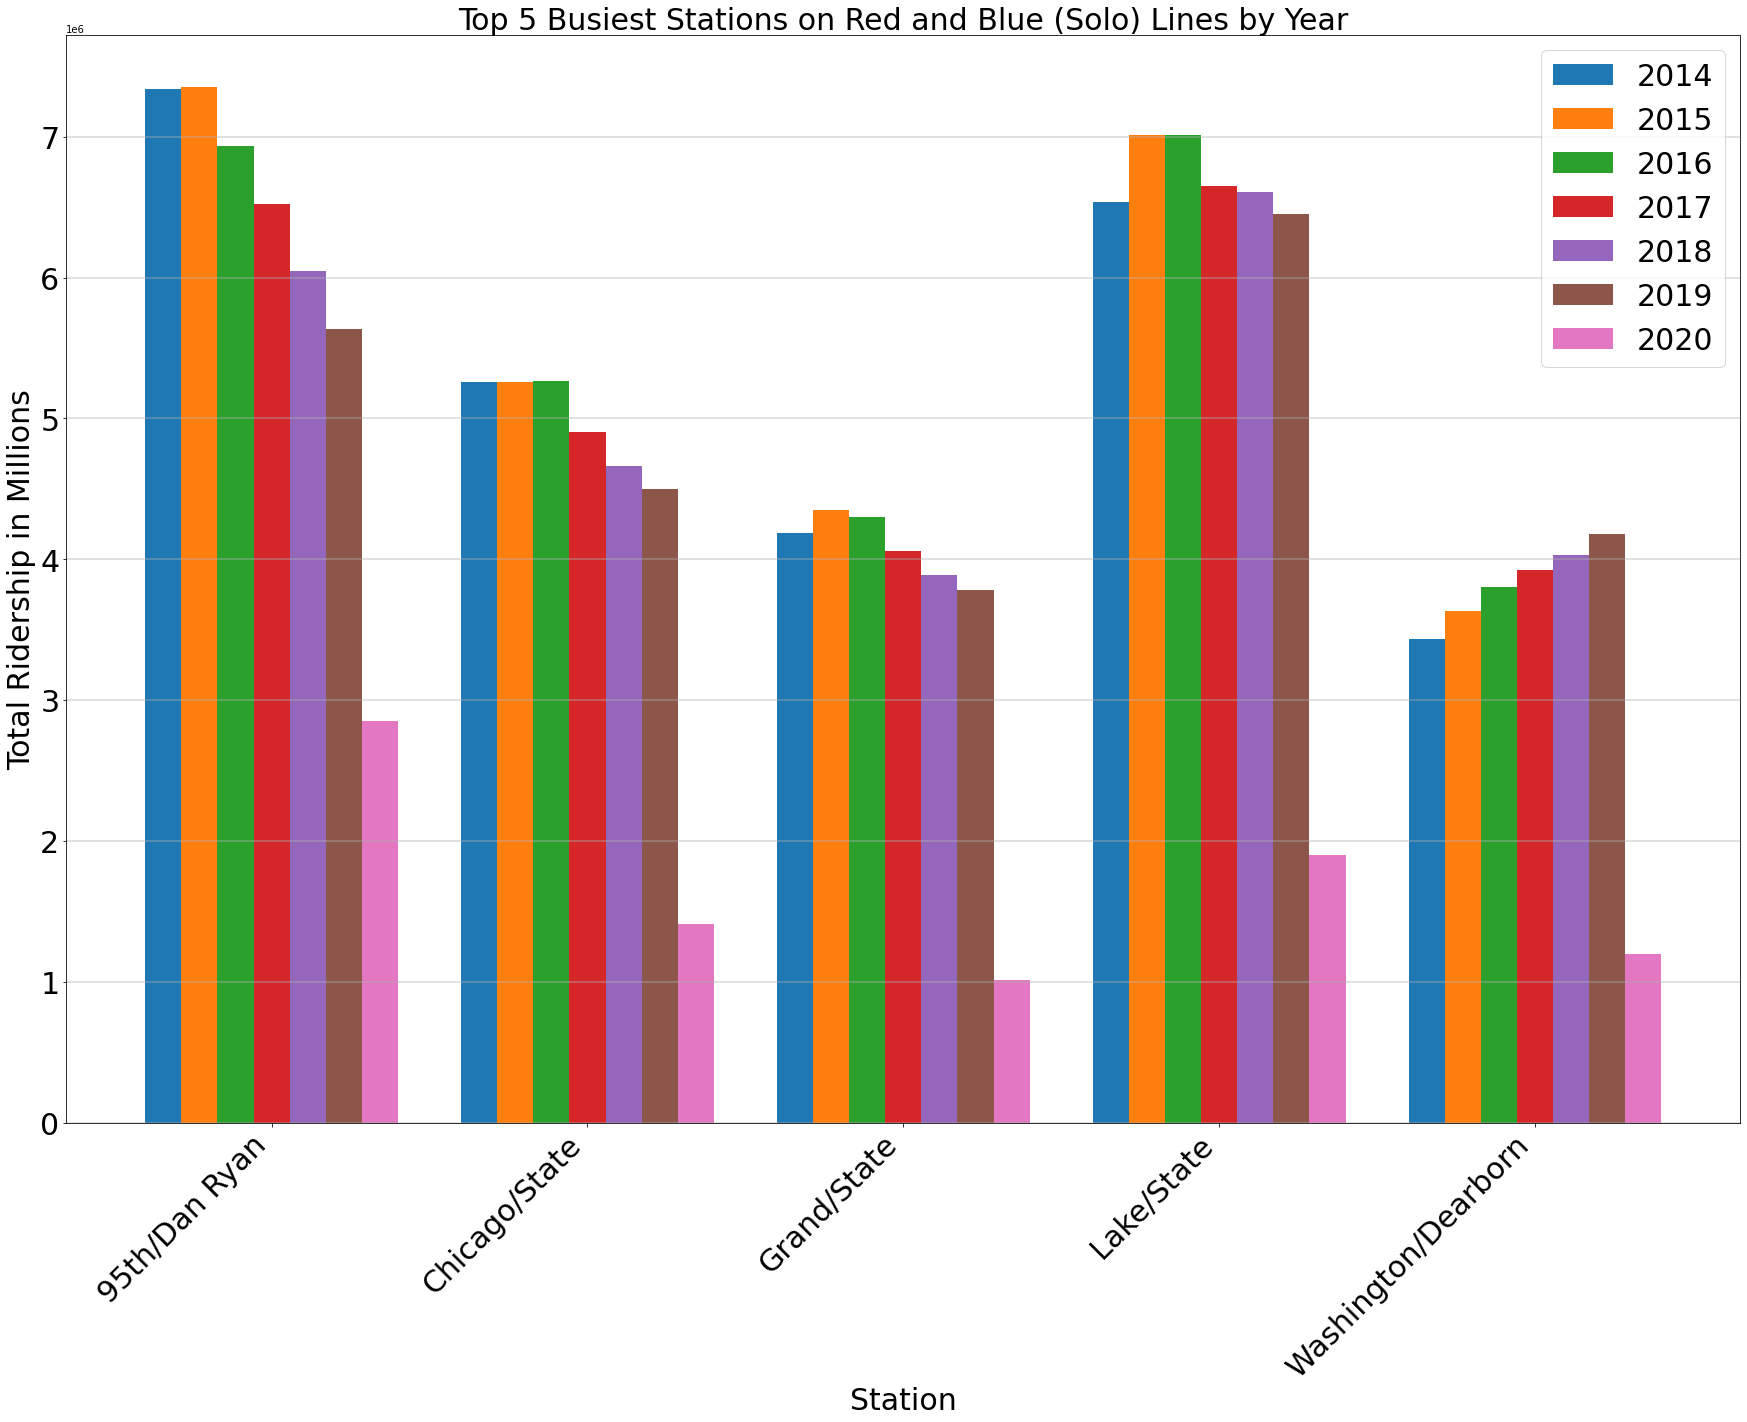

In [117]:
#plot
busiest_red_and_blue_station_df_viz.plot.bar(x='Station Name_x', figsize=(30,20), fontsize=30, width=.8)
plt.xticks(ha='right', rotation=45)
plt.title('Top 5 Busiest Stations on Red and Blue (Solo) Lines by Year', fontsize=30)
plt.ylabel('Total Ridership in Millions', fontsize=30)
plt.xlabel('Station', fontsize=30)
plt.legend(fontsize='xx-large', prop={'size': 30})
plt.grid(axis='y', alpha=.5, linewidth=1.5)
plt.savefig('Top 5 Busiest Stations on Red and Blue (Solo) Lines by Year.png')